In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

0: airplane 1: automobile 2: bird 3: cat 4: deer 5: dog 6: frog 7: horse 8: ship 9: truck

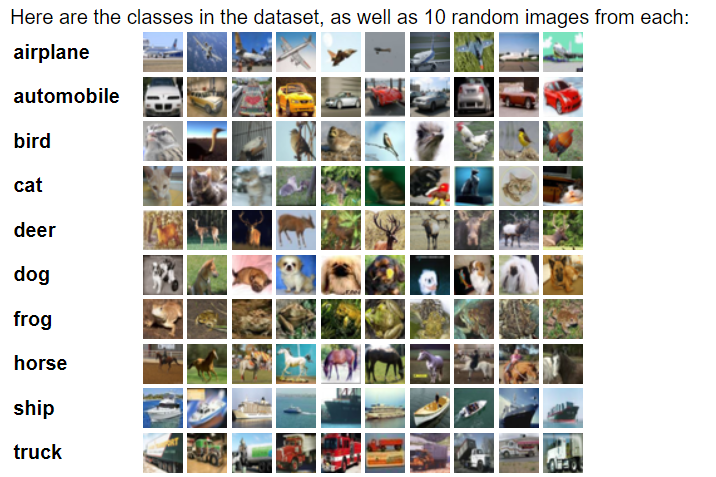

In [ ]:

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(rate=0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,           # Stop after 3 epochs with no improvement
    restore_best_weights=True # Restore model weights from the epoch with the best validation loss
)

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels),callbacks=[early_stopping])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3294 - loss: 1.7852 - val_accuracy: 0.5338 - val_loss: 1.2887
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5446 - loss: 1.2739 - val_accuracy: 0.5984 - val_loss: 1.1400
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6014 - loss: 1.1267 - val_accuracy: 0.6594 - val_loss: 0.9859
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6406 - loss: 1.0190 - val_accuracy: 0.6752 - val_loss: 0.9480
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6670 - loss: 0.9386 - val_accuracy: 0.6829 - val_loss: 0.8986
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6874 - loss: 0.8883 - val_accuracy: 0.7063 - val_loss: 0.8398
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7039 - loss: 0.8408 - val_accuracy: 0.7142 - val_loss: 0.8080
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7158 - loss

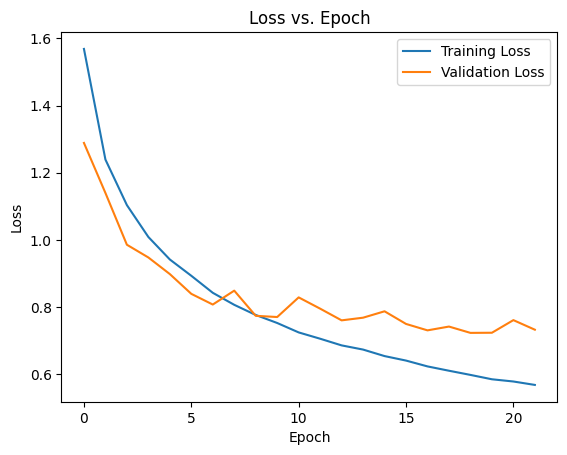

In [ ]:
import matplotlib.pyplot as plt
# Plot the training loss vs validation (test) loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7496 - loss: 0.7188
Test accuracy: 0.7475000023841858


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


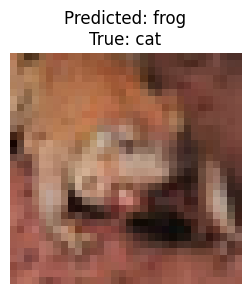

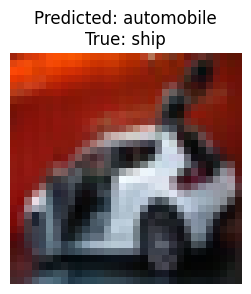

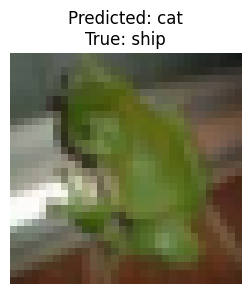

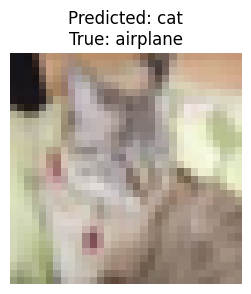

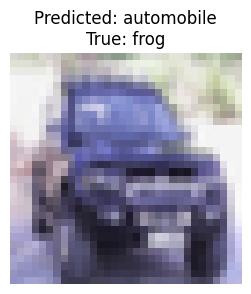

In [ ]:
import matplotlib.pyplot as plt

# Predict on some test images
import numpy as np

# Choose a few test images (you can change the indices as needed)
sample_images = test_images[5:10]

# Make predictions
predictions = model.predict(sample_images)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels for CIFAR-10
class_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Define a function to plot an image with its predicted label
def plot_image(image, predicted_label, true_label):
    plt.figure(figsize=(6, 3))
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
    plt.show()

# Predict on and plot the selected test images
for i, label_idx in enumerate(predicted_labels):
    predicted_label = class_labels[label_idx]
    true_label_idx = np.argmax(test_labels[i])
    true_label = class_labels[true_label_idx]

    # Plot the image
    plot_image(sample_images[i], predicted_label, true_label)


In [ ]:
Stop here


SyntaxError: invalid syntax (<ipython-input-18-bc113f3dc93b>, line 1)